In [1]:
import pandas as pd

In [2]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

'0.5.1'

In [3]:
from konlpy.tag import Okt
okt = Okt() # 객체 생성

In [4]:
from konlpy.tag import Twitter 
from collections import Counter

In [69]:
final = pd.read_csv('./data/중복허용_전처리완료.csv')

In [70]:
final.head()

,title,genre
0,우리 사랑하게 됐어요.,['댄스']
1,너 때문에,['댄스']
2,Bo Peep Bo Peep,['댄스']
3,오늘 헤어졌어요,['발라드']
4,처음처럼 그때처럼,['발라드']


In [71]:
# final = final[['title','genre']]

In [72]:
# final.to_csv('final_genre.csv', index = False)

In [73]:
final.shape

(51292, 2)

# 2. 댄스

In [74]:
# 댄스 = final[final['genre'] == '댄스']
댄스 = final[final['genre'].str.contains('댄스')]

In [75]:
댄스

,title,genre
0,우리 사랑하게 됐어요.,['댄스']
1,너 때문에,['댄스']
2,Bo Peep Bo Peep,['댄스']
6,Heartbeat,['댄스']
7,처음처럼,['댄스']
...,...,...
51271,날라리 (LALALAY),['댄스']
51274,Snapping,['댄스']
51281,우린 결국 다시 만날 운명이었지 (Destiny),['댄스']
51286,원더우먼,['댄스']


In [76]:
댄스 = 댄스['title']

In [78]:
댄스.to_csv('중복허용_댄스.txt', index = False)

# 텍스트 파일 불러오기

In [15]:
file = open("중복제거_댄스.txt", 'r') 
lists = file.readlines() 
file.close() 
lists

['우리 사랑하게 됐어요.\n',
 '너 때문에\n',
 'Bo Peep Bo Peep\n',
 'Heartbeat\n',
 '처음처럼\n',
 'Please Don`t Go\n',
 'Change \n',
 'YOU AND I\n',
 'No Love No More\n',
 '만만하니\n',
 'Sign\n',
 'Mystery\n',
 '눈 내리는 마을\n',
 '그 놈 목소리\n',
 '기다리다 지친다\n',
 '마쉬멜로우\n',
 'Chu~♡\n',
 'JoJo\n',
 '내 여자 \n',
 'Ring Ding Dong\n',
 'My Color\n',
 'Gossip Girl\n',
 'Love Like This (네게로)\n',
 'Bad Girl\n',
 '원더우먼\n',
 'Touch Me\n',
 'Chocolate Love \n',
 'TTL (Time To Love)\n',
 '너에게 미쳤었다\n',
 'Crazy (영화 `주유소 습격사건 2` 삽입곡)\n',
 '최면 \n',
 'Oh Yeah\n',
 'Muzik\n',
 'Heartbreaker\n',
 'Abracadabra\n',
 '심장을 놓쳐서\n',
 '징글징글 \n',
 'G.O.O.D Luv\n',
 'TTL Listen 2\n',
 'Tik Tok\n',
 'Jiggy (지기)\n',
 'Mazeltov\n',
 'Dreams Come True\n',
 '별을 따다줘\n',
 '사랑 하나 (네게 배운 말...) \n',
 '그녀에게 \n',
 'Oh!\n',
 '너 때문에 (Remix)\n',
 'Show! Show! Show!\n',
 '뻔 & Fun (Sweet Talking Baby)\n',
 '화성인 바이러스 (Boys & Girls) \n',
 '웃자 (Be Happy)\n',
 '무조건 해피엔딩 (Stick Wit U)\n',
 '좋은 일만 생각하기 (Day by Day)\n',
 'Without You\n',
 '날 따라 해봐요\n',
 '꽃을 든 남자 \n'

# 형태소 나누기

In [16]:
twitter = Twitter()
morphs = [] 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 

# 명사, 형용사, 부사만 골라내기

In [17]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
            noun_adj_adv_list.append(word) 
            
print(noun_adj_adv_list)


['우리', '사랑', '너', '때문', '처음처럼', '눈', '마을', '그', '놈', '목소리', '마쉬멜로우', '여자', '원더우먼', '너', '영화', '주유소', '습격', '사건', '삽입곡', '최면', '심장', '징글징글', '지기', '별', '사랑', '네', '그녀', '너', '때문', '뻔', '화성인', '바이러스', '무조건', '해피엔딩', '일만', '생각', '날', '꽃', '남자', '루팡', '오픈', '해피니스', '코카', '콜라', '미니', '코', '편', '사람', '너', '때문', '그대', '맘', '랄라레', '여자친구', '부탁', '동경', '소년', '유효', '기간', '여자', '스릴', '러브', '노원', '뱅', '술김', '점점', '더', '하루', '종일', '사랑', '사랑', '주제곡', '황야', '무법자', '마자', '봄날', '고백', '삐오', '시간', '자전거', '강', '기원', '응원가', '하루', '종일', '미인아', '남자', '승리', '함성', '첫키스', '가슴속', '핀', '꽃처럼', '전세계', '랭킹', '위', '남아공', '월드컵', '공식', '주제가', '매직', '드', '래그', '우유', '커피', '푸시', '푸시', '다시', '번', '대한민국', '리턴', '랜드', '다시', '비틀비틀', '사랑', '병', '마법소녀', '너', '사람', '또', '고백', '날', '삐리빠빠', '별놈', '고고씽', '절대', '집행', '유애', '이별', '드립', '고래', '강심장', '로고송', '욕', '사', '계', '후', '정신', '조각', '애기야', '바람', '필', '끝', '너', '가지', '맘마미아', '날', '가식', '걸', '사랑', '투', '너', '너', '사랑', '아야', '난', '비예', '비요', '기분', '여자', '지금', '가슴', '꿀', '단지', '사랑', 

# 빈도수대로 정렬하기

In [18]:
count = Counter(noun_adj_adv_list)

In [19]:
words = dict(count.most_common())

In [20]:
words

{'너': 36,
 '사랑': 19,
 '여자': 15,
 '날': 13,
 '밤': 11,
 '여름': 8,
 '별': 7,
 '그녀': 7,
 '남자': 7,
 '사람': 7,
 '다시': 7,
 '우리': 6,
 '눈': 6,
 '더': 6,
 '하루': 6,
 '뭐': 6,
 '때문': 5,
 '그': 5,
 '이별': 5,
 '노래': 5,
 '이': 5,
 '니': 5,
 '그대': 4,
 '고백': 4,
 '시간': 4,
 '걸': 4,
 '해': 4,
 '알': 4,
 '날라리': 4,
 '살': 4,
 '오늘': 4,
 '바보': 4,
 '빛': 4,
 '비': 4,
 '꽃': 3,
 '또': 3,
 '바람': 3,
 '지금': 3,
 '운명': 3,
 '크리스마스': 3,
 '때': 3,
 '장난': 3,
 '거울': 3,
 '보고': 3,
 '못': 3,
 '줄': 3,
 '기적': 3,
 '새벽': 3,
 '누구': 3,
 '비밀': 3,
 '아예': 3,
 '똑': 3,
 '놈': 2,
 '영화': 2,
 '사건': 2,
 '네': 2,
 '해피엔딩': 2,
 '맘': 2,
 '소년': 2,
 '러브': 2,
 '점점': 2,
 '종일': 2,
 '위': 2,
 '공식': 2,
 '커피': 2,
 '푸시': 2,
 '후': 2,
 '끝': 2,
 '맘마미아': 2,
 '아야': 2,
 '난': 2,
 '꿀': 2,
 '숨': 2,
 '하늘': 2,
 '땅': 2,
 '진실': 2,
 '부제': 2,
 '왜': 2,
 '평생': 2,
 '속': 2,
 '핑크': 2,
 '오빠': 2,
 '쿵': 2,
 '아이스크림': 2,
 '거': 2,
 '제일': 2,
 '한번': 2,
 '좀': 2,
 '부산': 2,
 '로맨스': 2,
 '인생': 2,
 '여인': 2,
 '호': 2,
 '친구': 2,
 '향': 2,
 '아저씨': 2,
 '방': 2,
 '구석': 2,
 '널': 2,
 '핫': 2,
 '보이': 2,
 '바다': 2,
 '립스

# 사랑,사람,너 제거

In [21]:
del words['사랑']
del words['사람']
del words['너']

# 워드 클라우드 만들기

In [22]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

import nltk 
from nltk.corpus import stopwords

In [23]:
%matplotlib inline 
import matplotlib
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 

set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)


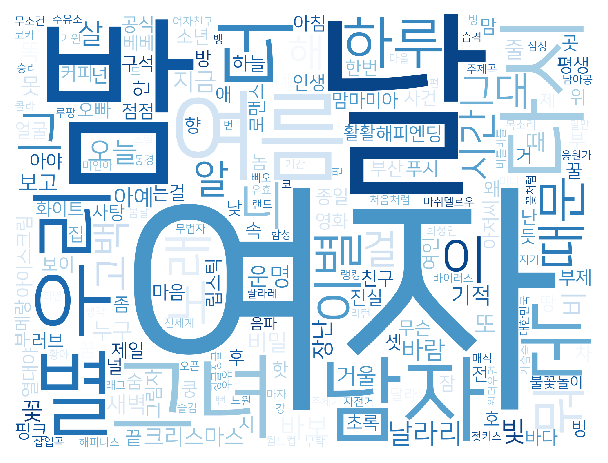

In [24]:
wordcloud = WordCloud(font_path = '/Users/yaein/Library/Fonts/NanumSquareOTFRegular.otf', background_color='White',colormap = "Blues", width=2000, height=1500).generate_from_frequencies(words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

# 이미지를 입혀보아요

In [59]:
from PIL import Image
import numpy as np

In [60]:
alice_mask = np.array(Image.open("./alice_mask.png"))

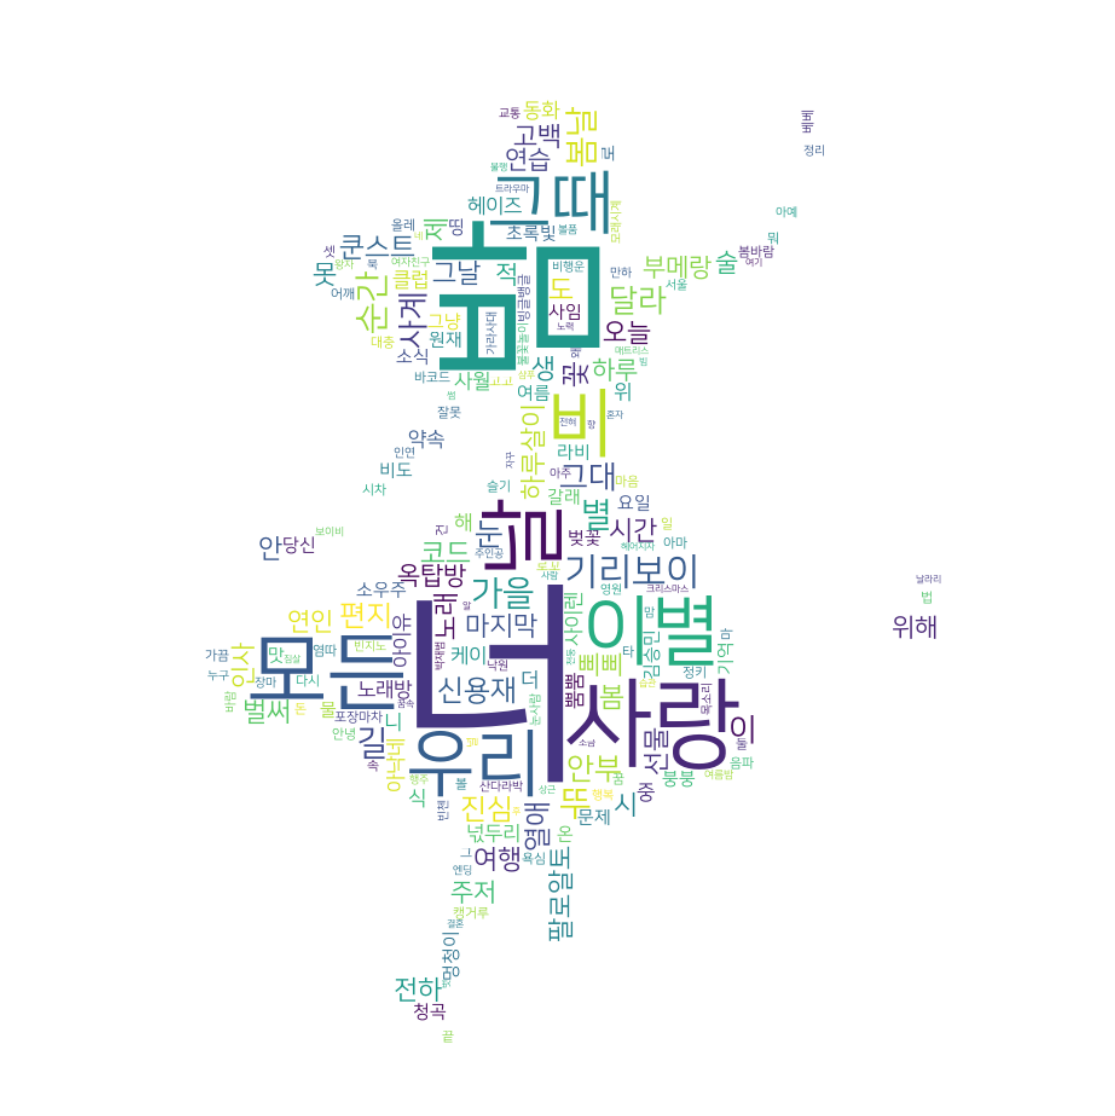

In [62]:
wordcloud = WordCloud(
    font_path = '/Users/yaein/Library/Fonts/NanumSquareOTFRegular.otf',             
    width = 800,
    height = 800,
    background_color="white",
    mask = alice_mask
).generate_from_frequencies(words) 

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()